In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv


In [2]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Lasso regression model
lasso = Lasso(alpha=0.01)  # Adjust the alpha parameter for different levels of regularization

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Get the coefficients of the features after LASSO regularization
lasso_coefficients = lasso.coef_

# Print the coefficients and corresponding feature names
for feature, coef in zip(X.columns, lasso_coefficients):
    print(f"{feature}: {coef}")

# Evaluate the model on the test data
lasso_score = lasso.score(X_test, y_test)
print(f"R^2 Score on Test Data: {lasso_score}")

age: 0.0037907521659306526
sex: 0.1263420250314118
chest pain type: 0.11653975000129413
resting bp s: 0.0005517590321986225
cholesterol: -0.000450133870583787
fasting blood sugar: 0.05238197029748857
resting ecg: 0.0
max heart rate: -0.0024813298955171374
exercise angina: 0.1339417520592674
oldpeak: 0.05296550542224579
ST slope: 0.17161314671692424
R^2 Score on Test Data: 0.47915973942471046


In [3]:
# Sex, Chest Pain Type, Fasting Blood Sugar, Exercise-Induced Angina, Oldpeak, and ST Slope

**Logistic Regression**

Training Accuracy: 0.8340336134453782
Testing Accuracy: 0.8529411764705882


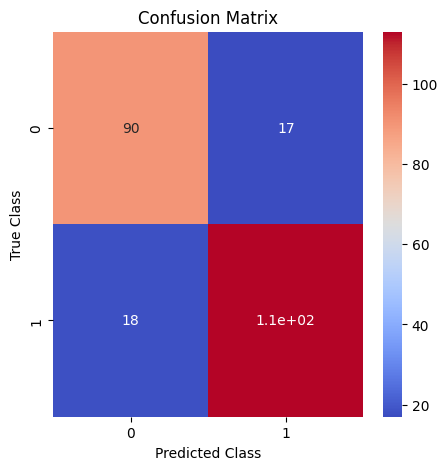

Precision: 0.8692307692307693
Sensitivity: 0.8625954198473282
Specificity: 0.8411214953271028
F1-score: 0.8659003831417624


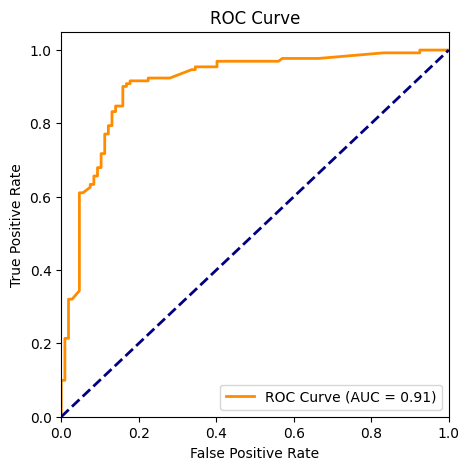

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "cholesterol", "resting ecg", "max heart rate", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Multiple Regression**

Accuracy: 0.7016806722689075


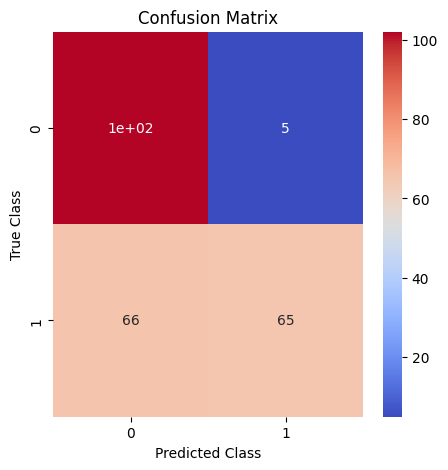

Precision: 0.9285714285714286
Sensitivity: 0.4961832061068702
Specificity: 0.9532710280373832
F1-score: 0.6467661691542288


In [5]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "cholesterol", "resting ecg", "max heart rate", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the model
regr = linear_model.LinearRegression()
regr.fit(X, y)

# predictions on the test set
y_pred = regr.predict(X_test)

# applying a threshold of 0.8 to obtain binary predictions
y_pred_binary = np.where(y_pred >= 0.8, 1, 0)

accuracy = accuracy_score(y_test, y_pred_binary)
print('Accuracy:', accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)


**Decision Tree**

Training Accuracy: 0.8571428571428571
Testing Accuracy: 0.8613445378151261


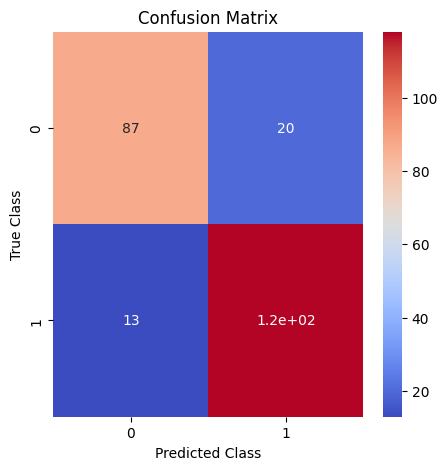

Precision: 0.855072463768116
Sensitivity: 0.9007633587786259
Specificity: 0.8130841121495327
F1-score: 0.8773234200743495


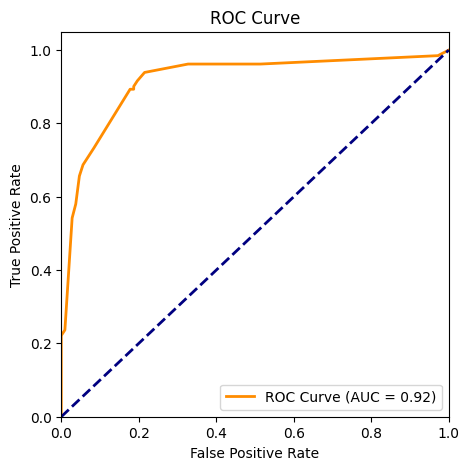

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "cholesterol", "resting ecg", "max heart rate", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(max_depth = 5, random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = decision_tree_model.predict(X_train)
y_test_pred = decision_tree_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, decision_tree_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, decision_tree_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


**Random Forest**

Training Accuracy: 0.8686974789915967
Testing Accuracy: 0.8823529411764706


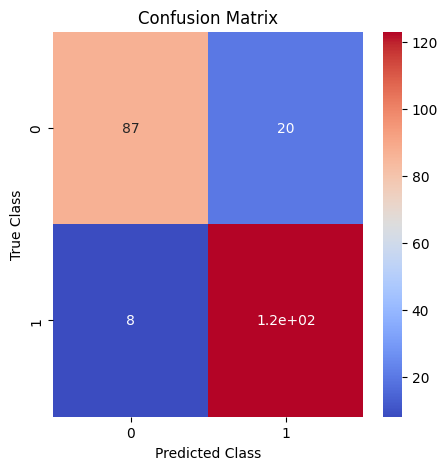

Precision: 0.8601398601398601
Sensitivity: 0.9389312977099237
Specificity: 0.8130841121495327
F1-score: 0.8978102189781021


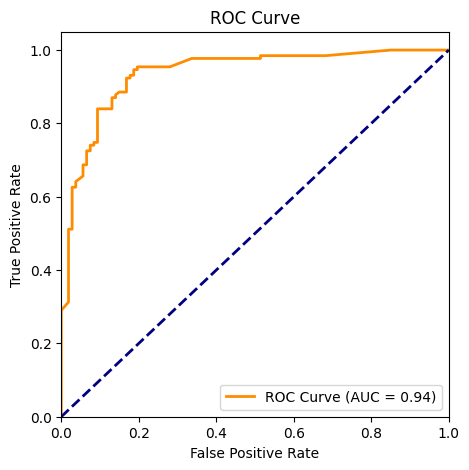

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "cholesterol", "resting ecg", "max heart rate", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
random_forest_model = RandomForestClassifier(max_depth = 5, n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = random_forest_model.predict(X_train)
y_test_pred = random_forest_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# Print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, random_forest_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**KNN**

Training Accuracy: 0.8718487394957983
Testing Accuracy: 0.8445378151260504


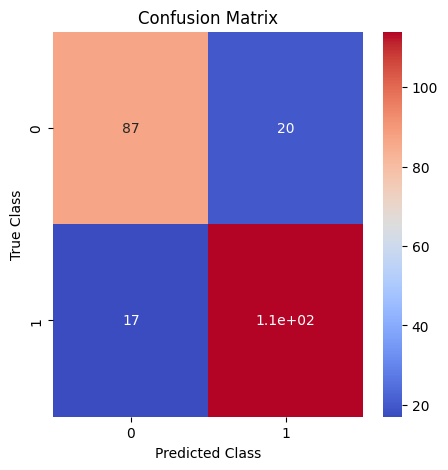

Precision: 0.8507462686567164
Sensitivity: 0.8702290076335878
Specificity: 0.8130841121495327
F1-score: 0.8603773584905662


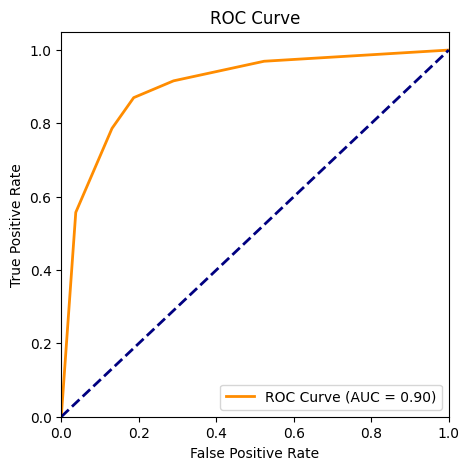

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "cholesterol", "resting ecg", "max heart rate", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a K-Nearest Neighbors (KNN) classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# Print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**SVM**

Training Accuracy: 0.8361344537815126
Testing Accuracy: 0.8571428571428571


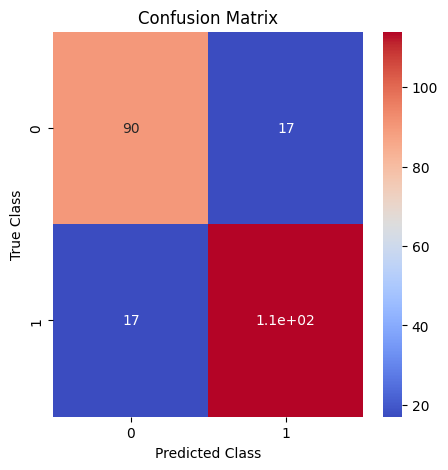

Precision: 0.8702290076335878
Sensitivity: 0.8702290076335878
Specificity: 0.8411214953271028
F1-score: 0.8702290076335878


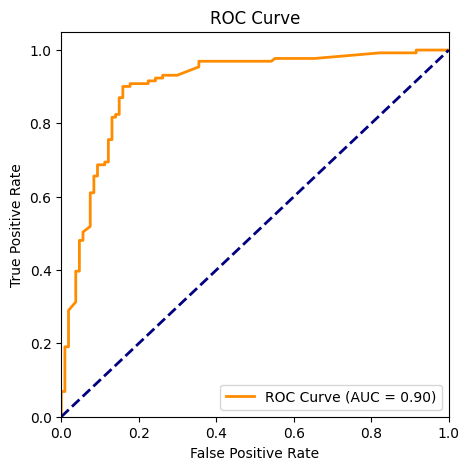

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "cholesterol", "resting ecg", "max heart rate", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Support Vector Machine (SVM) classifier
svm_model = SVC(kernel='linear', C=1.0, random_state=42, probability = True)
svm_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# Print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Naive Bayes**

Training Accuracy: 0.8277310924369747
Testing Accuracy: 0.8613445378151261


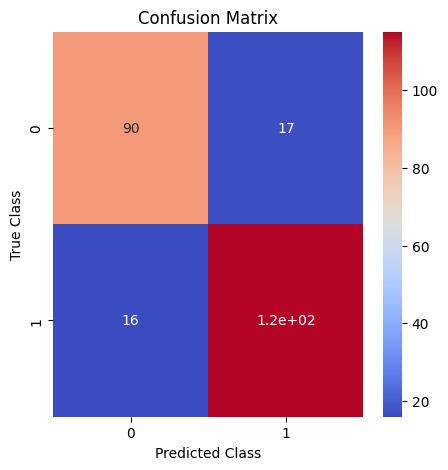

Precision: 0.8712121212121212
Sensitivity: 0.8778625954198473
Specificity: 0.8411214953271028
F1-score: 0.8745247148288973


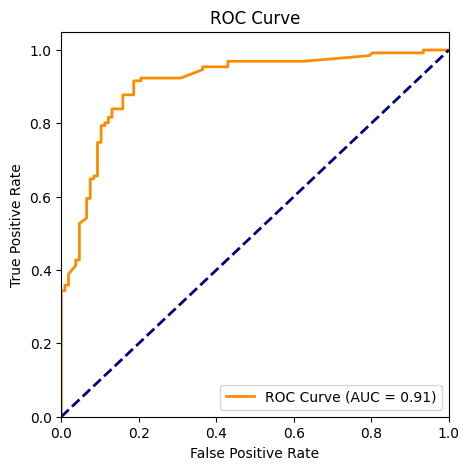

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "cholesterol", "resting ecg", "max heart rate", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Gaussian Naive Bayes classifier
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = naive_bayes_model.predict(X_train)
y_test_pred = naive_bayes_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# Print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, naive_bayes_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, naive_bayes_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**MLP**

Training Accuracy: 0.9023109243697479
Testing Accuracy: 0.8361344537815126


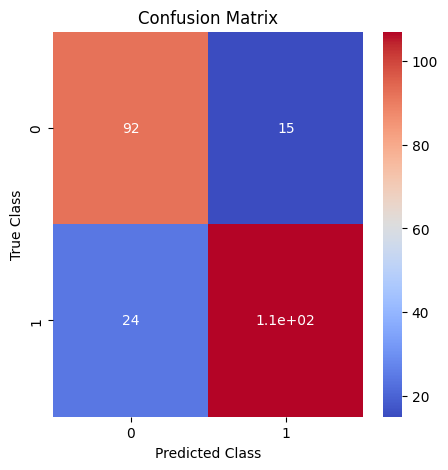

Precision: 0.8770491803278688
Sensitivity: 0.816793893129771
Specificity: 0.8598130841121495
F1-score: 0.8458498023715415


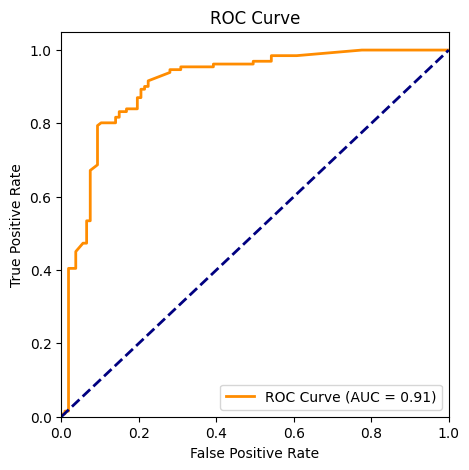

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "cholesterol", "resting ecg", "max heart rate", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an Artificial Neural Network (ANN) classifier
ann_model = MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=1000, random_state=42)
ann_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = ann_model.predict(X_train)
y_test_pred = ann_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = tp / (tp + fp)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * ((precision * sensitivity) / (precision + sensitivity))

# Print the results
print("Precision:", precision)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, ann_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, ann_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**XGBoost**

Training Accuracy: 0.9149159663865546
Testing Accuracy: 0.8571428571428571


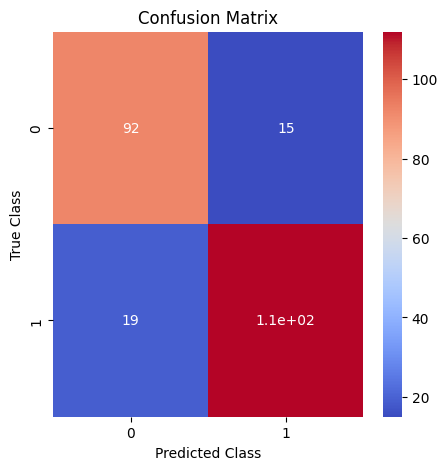

Precision: 0.8818897637795275
Sensitivity (Recall): 0.8549618320610687
Specificity: 0.8598130841121495
F1-score: 0.868217054263566


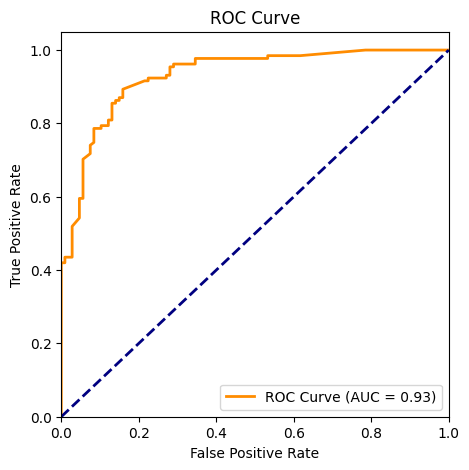

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "cholesterol", "resting ecg", "max heart rate", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Training Accuracy: 0.8802521008403361
Testing Accuracy: 0.8739495798319328


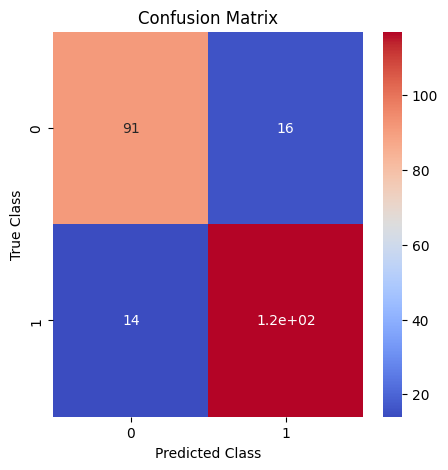

Precision: 0.8796992481203008
Sensitivity (Recall): 0.8931297709923665
Specificity: 0.8504672897196262
F1-score: 0.8863636363636365


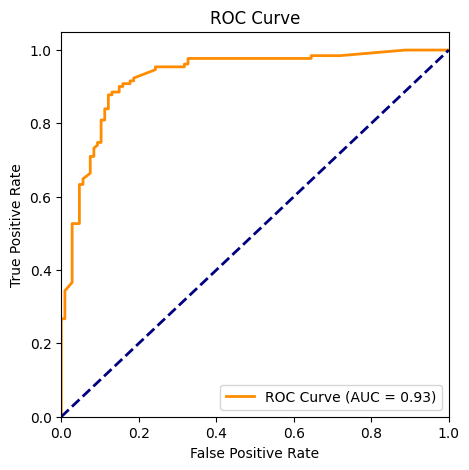

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "cholesterol", "resting ecg", "max heart rate", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an XGBoost classifier with overfitting mitigation techniques
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=3,  # Limit tree depth
    min_child_weight=1,  # Minimum sum of instance weight (hessian) needed in a child
    gamma=0,  # Minimum loss reduction required to make a further partition on a leaf node
    subsample=0.8,  # Fraction of samples used for training
    colsample_bytree=0.8,  # Fraction of features used for training
    reg_alpha=0.1,  # L1 regularization term on weights
    reg_lambda=1.0  # L2 regularization term on weights
)
xgb_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**AdaBoost**

Training Accuracy: 0.8508403361344538
Testing Accuracy: 0.8403361344537815


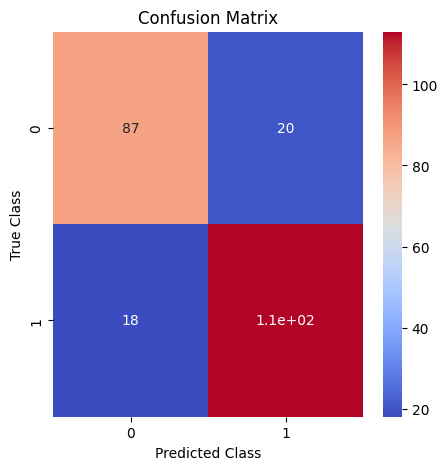

Precision: 0.849624060150376
Sensitivity (Recall): 0.8625954198473282
Specificity: 0.8130841121495327
F1-score: 0.8560606060606061


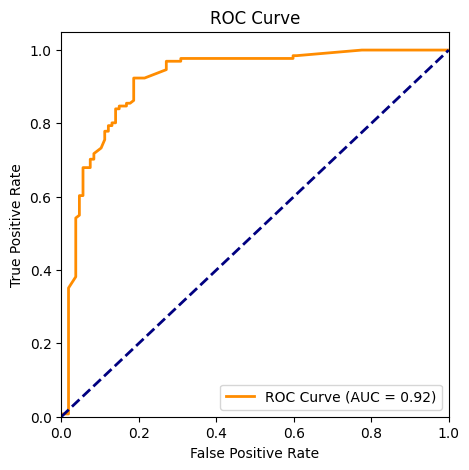

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "cholesterol", "resting ecg", "max heart rate", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an AdaBoost classifier
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = adaboost_model.predict(X_train)
y_test_pred = adaboost_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, adaboost_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, adaboost_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Stochastic Gradient Classifier**

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Training Accuracy: 0.8340336134453782
Testing Accuracy: 0.8487394957983193


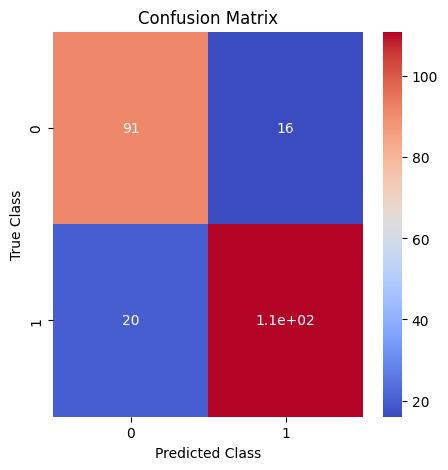

Precision: 0.8740157480314961
Sensitivity (Recall): 0.8473282442748091
Specificity: 0.8504672897196262
F1-score: 0.8604651162790697


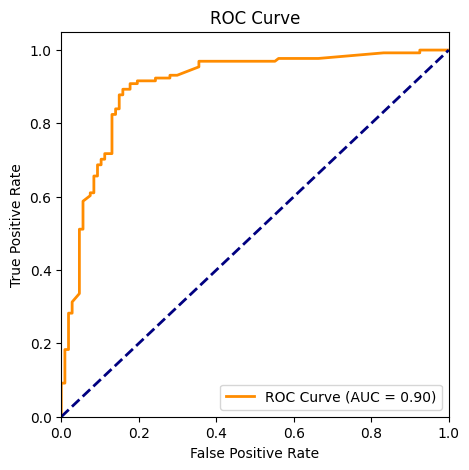

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "cholesterol", "resting ecg", "max heart rate", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an SGD Classifier
# log or modified_huber
sgd_model = SGDClassifier(loss = "log", random_state=42)
sgd_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = sgd_model.predict(X_train)
y_test_pred = sgd_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, sgd_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, sgd_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Training Accuracy: 0.8371848739495799
Testing Accuracy: 0.8613445378151261


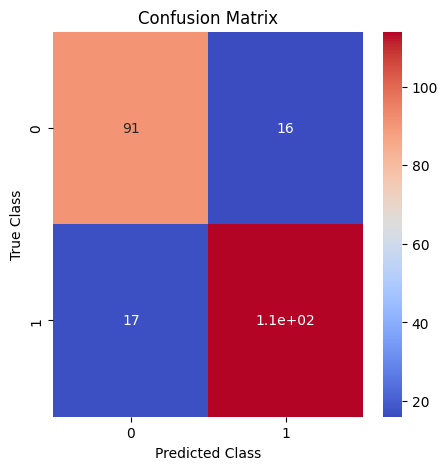

Precision: 0.8769230769230769
Sensitivity (Recall): 0.8702290076335878
Specificity: 0.8504672897196262
F1-score: 0.8735632183908046


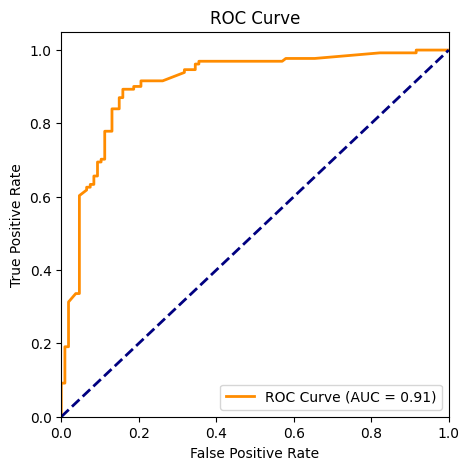

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "cholesterol", "resting ecg", "max heart rate", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and customize an SGD Classifier
# log or modified_huber
sgd_model = SGDClassifier(
    loss="log",  # The loss function (hinge for linear SVM)
    penalty="l2",  # Regularization term (l2 for Ridge regularization)
    alpha=0.001,  # Regularization strength
    max_iter=1000,  # Maximum number of iterations
    random_state=42
)

sgd_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = sgd_model.predict(X_train)
y_test_pred = sgd_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, sgd_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, sgd_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Gradient Boosting Classifier**

Training Accuracy: 0.9180672268907563
Testing Accuracy: 0.8529411764705882


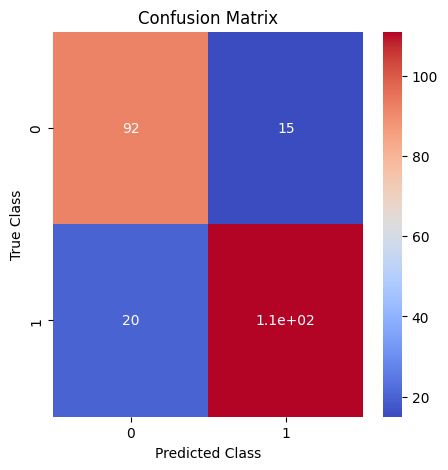

Precision: 0.8809523809523809
Sensitivity (Recall): 0.8473282442748091
Specificity: 0.8598130841121495
F1-score: 0.8638132295719844


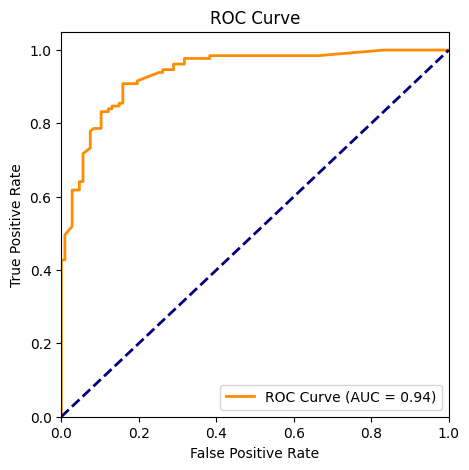

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "cholesterol", "resting ecg", "max heart rate", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and customize a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(
    n_estimators=100,  # Number of boosting stages to be used
    max_depth=5,       # Maximum depth of individual trees
    random_state=42
)

gb_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gb_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Extra Tree Classifier**

Training Accuracy: 0.851890756302521
Testing Accuracy: 0.8529411764705882


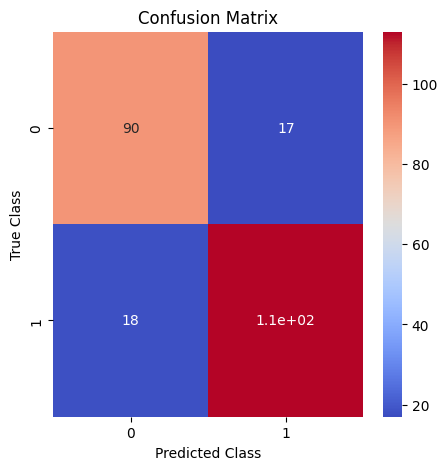

Precision: 0.8692307692307693
Sensitivity (Recall): 0.8625954198473282
Specificity: 0.8411214953271028
F1-score: 0.8659003831417624


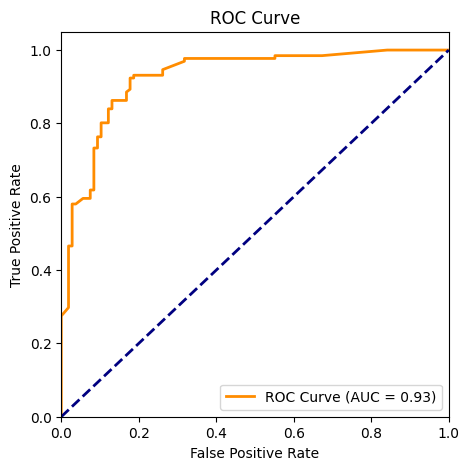

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "cholesterol", "resting ecg", "max heart rate", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and customize an Extra Trees Classifier
extra_trees_model = ExtraTreesClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=5,       # Maximum depth of individual trees
    random_state=42
)

extra_trees_model.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = extra_trees_model.predict(X_train)
y_test_pred = extra_trees_model.predict(X_test)

# Calculate training and testing accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Generate and display the confusion matrix
conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_mat, annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Calculate performance metrics
tp = conf_mat[1][1]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[0][0]

precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = tn / (tn + fp)
f1_score = f1_score(y_test, y_test_pred)

# Print the results
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1_score)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, extra_trees_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, extra_trees_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**RNN**

Epoch 1/100
24/24 - 4s - loss: 0.4488 - accuracy: 0.8252 - val_loss: 0.4848 - val_accuracy: 0.7906 - 4s/epoch - 182ms/step
Epoch 2/100
24/24 - 0s - loss: 0.3884 - accuracy: 0.8423 - val_loss: 0.4695 - val_accuracy: 0.7853 - 132ms/epoch - 5ms/step
Epoch 3/100
24/24 - 0s - loss: 0.3779 - accuracy: 0.8528 - val_loss: 0.4617 - val_accuracy: 0.7958 - 143ms/epoch - 6ms/step
Epoch 4/100
24/24 - 0s - loss: 0.3719 - accuracy: 0.8423 - val_loss: 0.4751 - val_accuracy: 0.7801 - 129ms/epoch - 5ms/step
Epoch 5/100
24/24 - 0s - loss: 0.3653 - accuracy: 0.8502 - val_loss: 0.4611 - val_accuracy: 0.7958 - 139ms/epoch - 6ms/step
Epoch 6/100
24/24 - 0s - loss: 0.3581 - accuracy: 0.8502 - val_loss: 0.4593 - val_accuracy: 0.7958 - 138ms/epoch - 6ms/step
Epoch 7/100
24/24 - 0s - loss: 0.3556 - accuracy: 0.8463 - val_loss: 0.4543 - val_accuracy: 0.7801 - 132ms/epoch - 5ms/step
Epoch 8/100
24/24 - 0s - loss: 0.3504 - accuracy: 0.8541 - val_loss: 0.4608 - val_accuracy: 0.8063 - 126ms/epoch - 5ms/step
Epoch 9/1

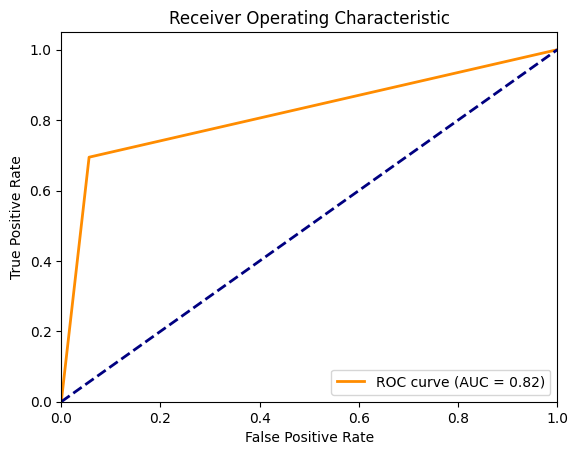

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "cholesterol", "resting ecg", "max heart rate", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for SimpleRNN input (assuming a sequence length of 1)
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

# Initialize and configure the RNN model using SimpleRNN
model = keras.Sequential([
    layers.SimpleRNN(128, return_sequences=True, activation='relu', input_shape=(1, X_train.shape[2])),
    layers.SimpleRNN(64, return_sequences=True),
    layers.SimpleRNN(32),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.8).astype(int)

# Calculate performance metrics
conf_mat = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
f1 = f1_score(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


**LSTM**

Epoch 1/100
24/24 - 7s - loss: 0.6877 - accuracy: 0.7096 - val_loss: 0.6785 - val_accuracy: 0.7173 - 7s/epoch - 308ms/step
Epoch 2/100
24/24 - 0s - loss: 0.6227 - accuracy: 0.8318 - val_loss: 0.5551 - val_accuracy: 0.7487 - 212ms/epoch - 9ms/step
Epoch 3/100
24/24 - 0s - loss: 0.4398 - accuracy: 0.8357 - val_loss: 0.4730 - val_accuracy: 0.7644 - 227ms/epoch - 9ms/step
Epoch 4/100
24/24 - 0s - loss: 0.3894 - accuracy: 0.8371 - val_loss: 0.4808 - val_accuracy: 0.7906 - 213ms/epoch - 9ms/step
Epoch 5/100
24/24 - 0s - loss: 0.3786 - accuracy: 0.8410 - val_loss: 0.4763 - val_accuracy: 0.7801 - 223ms/epoch - 9ms/step
Epoch 6/100
24/24 - 0s - loss: 0.3731 - accuracy: 0.8449 - val_loss: 0.4745 - val_accuracy: 0.7906 - 217ms/epoch - 9ms/step
Epoch 7/100
24/24 - 0s - loss: 0.3687 - accuracy: 0.8463 - val_loss: 0.4713 - val_accuracy: 0.7906 - 233ms/epoch - 10ms/step
Epoch 8/100
24/24 - 0s - loss: 0.3665 - accuracy: 0.8555 - val_loss: 0.4753 - val_accuracy: 0.7801 - 224ms/epoch - 9ms/step
Epoch 9/

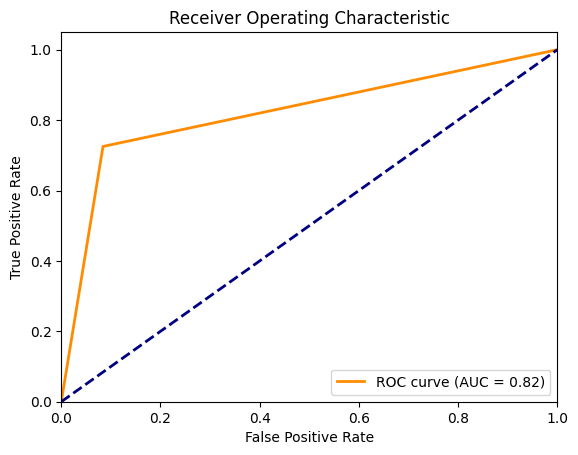

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "cholesterol", "resting ecg", "max heart rate", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for LSTM input (assuming a sequence length of 1)
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

# Initialize and configure the LSTM model
model = keras.Sequential([
    layers.LSTM(128, return_sequences=True, activation='relu', input_shape=(1, X_train.shape[2])),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(32),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.8).astype(int)

# Calculate performance metrics
conf_mat = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
f1 = f1_score(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


**GRU**

Epoch 1/100
24/24 - 8s - loss: 0.6534 - accuracy: 0.7884 - val_loss: 0.5907 - val_accuracy: 0.7696 - 8s/epoch - 322ms/step
Epoch 2/100
24/24 - 0s - loss: 0.4555 - accuracy: 0.8397 - val_loss: 0.4745 - val_accuracy: 0.7906 - 200ms/epoch - 8ms/step
Epoch 3/100
24/24 - 0s - loss: 0.3955 - accuracy: 0.8463 - val_loss: 0.4760 - val_accuracy: 0.7801 - 196ms/epoch - 8ms/step
Epoch 4/100
24/24 - 0s - loss: 0.3824 - accuracy: 0.8397 - val_loss: 0.4671 - val_accuracy: 0.7906 - 221ms/epoch - 9ms/step
Epoch 5/100
24/24 - 0s - loss: 0.3733 - accuracy: 0.8476 - val_loss: 0.4690 - val_accuracy: 0.7906 - 215ms/epoch - 9ms/step
Epoch 6/100
24/24 - 0s - loss: 0.3691 - accuracy: 0.8489 - val_loss: 0.4669 - val_accuracy: 0.7853 - 217ms/epoch - 9ms/step
Epoch 7/100
24/24 - 0s - loss: 0.3653 - accuracy: 0.8489 - val_loss: 0.4617 - val_accuracy: 0.7906 - 218ms/epoch - 9ms/step
Epoch 8/100
24/24 - 0s - loss: 0.3625 - accuracy: 0.8502 - val_loss: 0.4658 - val_accuracy: 0.7906 - 251ms/epoch - 10ms/step
Epoch 9/

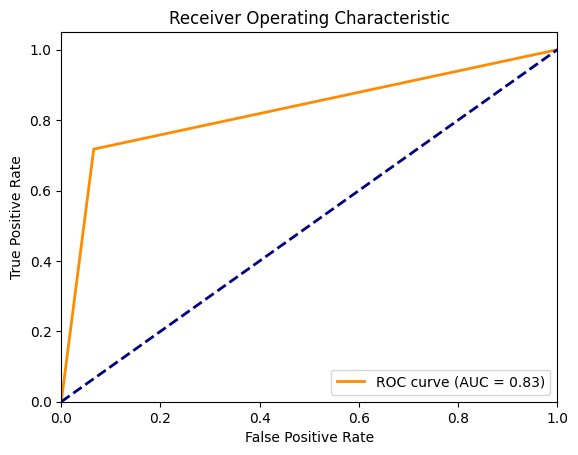

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "cholesterol", "resting ecg", "max heart rate", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for GRU input (assuming a sequence length of 1)
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

# Initialize and configure the GRU model
model = keras.Sequential([
    layers.GRU(128, return_sequences=True, activation='relu', input_shape=(1, X_train.shape[2])),
    layers.GRU(64, return_sequences=True),
    layers.GRU(32),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.8).astype(int)

# Calculate performance metrics
conf_mat = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
f1 = f1_score(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


**CNN**

**BiLSTM**

Epoch 1/100
24/24 - 12s - loss: 0.6870 - accuracy: 0.7648 - val_loss: 0.6749 - val_accuracy: 0.7644 - 12s/epoch - 481ms/step
Epoch 2/100
24/24 - 0s - loss: 0.5955 - accuracy: 0.8397 - val_loss: 0.5040 - val_accuracy: 0.7749 - 310ms/epoch - 13ms/step
Epoch 3/100
24/24 - 0s - loss: 0.4156 - accuracy: 0.8436 - val_loss: 0.4959 - val_accuracy: 0.7906 - 362ms/epoch - 15ms/step
Epoch 4/100
24/24 - 0s - loss: 0.3845 - accuracy: 0.8423 - val_loss: 0.4774 - val_accuracy: 0.7801 - 308ms/epoch - 13ms/step
Epoch 5/100
24/24 - 0s - loss: 0.3762 - accuracy: 0.8489 - val_loss: 0.4742 - val_accuracy: 0.7853 - 334ms/epoch - 14ms/step
Epoch 6/100
24/24 - 0s - loss: 0.3708 - accuracy: 0.8515 - val_loss: 0.4692 - val_accuracy: 0.7906 - 292ms/epoch - 12ms/step
Epoch 7/100
24/24 - 0s - loss: 0.3656 - accuracy: 0.8541 - val_loss: 0.4670 - val_accuracy: 0.7906 - 273ms/epoch - 11ms/step
Epoch 8/100
24/24 - 0s - loss: 0.3642 - accuracy: 0.8541 - val_loss: 0.4682 - val_accuracy: 0.8010 - 292ms/epoch - 12ms/step


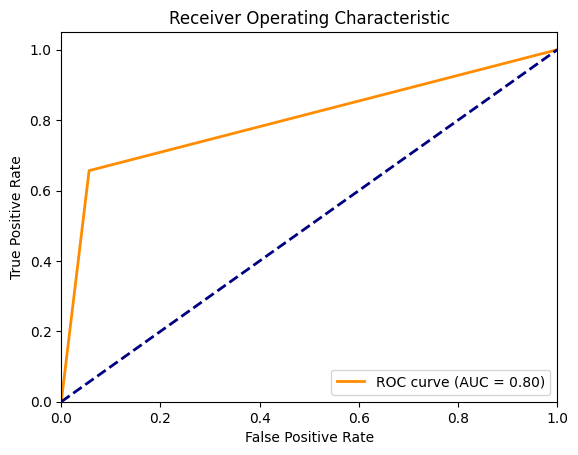

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "cholesterol", "resting ecg", "max heart rate", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for BiLSTM input (assuming a sequence length of 1)
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

# Initialize and configure the BiLSTM model
model = keras.Sequential([
    Bidirectional(layers.LSTM(128, return_sequences=True, activation='relu'), input_shape=(1, X_train.shape[2])),
    Bidirectional(layers.LSTM(64, return_sequences=True, activation='relu')),
    Bidirectional(layers.LSTM(32, activation='relu')),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.8).astype(int)

# Calculate performance metrics
conf_mat = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
f1 = f1_score(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


**BiGRU**

Epoch 1/100
24/24 - 12s - loss: 0.6354 - accuracy: 0.8173 - val_loss: 0.5517 - val_accuracy: 0.7644 - 12s/epoch - 482ms/step
Epoch 2/100
24/24 - 0s - loss: 0.4195 - accuracy: 0.8397 - val_loss: 0.5069 - val_accuracy: 0.7696 - 251ms/epoch - 10ms/step
Epoch 3/100
24/24 - 0s - loss: 0.3822 - accuracy: 0.8502 - val_loss: 0.4753 - val_accuracy: 0.8063 - 299ms/epoch - 12ms/step
Epoch 4/100
24/24 - 0s - loss: 0.3712 - accuracy: 0.8423 - val_loss: 0.4886 - val_accuracy: 0.7749 - 256ms/epoch - 11ms/step
Epoch 5/100
24/24 - 0s - loss: 0.3661 - accuracy: 0.8555 - val_loss: 0.4689 - val_accuracy: 0.7958 - 303ms/epoch - 13ms/step
Epoch 6/100
24/24 - 0s - loss: 0.3584 - accuracy: 0.8541 - val_loss: 0.4678 - val_accuracy: 0.7958 - 255ms/epoch - 11ms/step
Epoch 7/100
24/24 - 0s - loss: 0.3537 - accuracy: 0.8541 - val_loss: 0.4637 - val_accuracy: 0.7958 - 262ms/epoch - 11ms/step
Epoch 8/100
24/24 - 0s - loss: 0.3505 - accuracy: 0.8568 - val_loss: 0.4665 - val_accuracy: 0.8063 - 259ms/epoch - 11ms/step


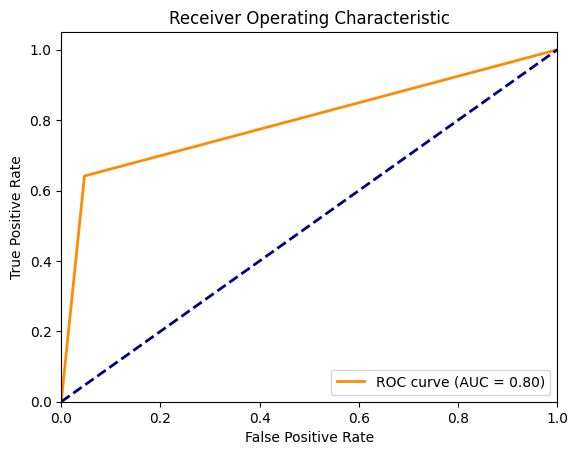

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "cholesterol", "resting ecg", "max heart rate", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for BiLSTM input (assuming a sequence length of 1)
X_train = X_train.reshape(-1, 1, X_train.shape[1])
X_test = X_test.reshape(-1, 1, X_test.shape[1])

# Initialize and configure the BiLSTM model
model = keras.Sequential([
    Bidirectional(layers.GRU(128, return_sequences=True, activation='relu'), input_shape=(1, X_train.shape[2])),
    Bidirectional(layers.GRU(64, return_sequences=True, activation='relu')),
    Bidirectional(layers.GRU(32, activation='relu')),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_test_pred = (y_test_pred > 0.8).astype(int)

# Calculate performance metrics
conf_mat = confusion_matrix(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
sensitivity = recall_score(y_test, y_test_pred)
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
f1 = f1_score(y_test, y_test_pred)

print("Confusion Matrix:\n", conf_mat)
print("Precision:", precision)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("F1-score:", f1)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


**Hybrid Model**

Epoch 1/100
12/12 - 45s - loss: 0.5655 - accuracy: 0.7622 - val_loss: 0.4989 - val_accuracy: 0.7592 - 45s/epoch - 4s/step
Epoch 2/100
12/12 - 0s - loss: 0.4209 - accuracy: 0.8187 - val_loss: 0.4828 - val_accuracy: 0.7749 - 287ms/epoch - 24ms/step
Epoch 3/100
12/12 - 0s - loss: 0.4023 - accuracy: 0.8397 - val_loss: 0.4828 - val_accuracy: 0.7906 - 268ms/epoch - 22ms/step
Epoch 4/100
12/12 - 0s - loss: 0.3890 - accuracy: 0.8423 - val_loss: 0.4694 - val_accuracy: 0.7958 - 278ms/epoch - 23ms/step
Epoch 5/100
12/12 - 0s - loss: 0.3745 - accuracy: 0.8568 - val_loss: 0.4664 - val_accuracy: 0.7906 - 261ms/epoch - 22ms/step
Epoch 6/100
12/12 - 0s - loss: 0.3664 - accuracy: 0.8502 - val_loss: 0.4643 - val_accuracy: 0.7958 - 267ms/epoch - 22ms/step
Epoch 7/100
12/12 - 0s - loss: 0.3595 - accuracy: 0.8515 - val_loss: 0.4640 - val_accuracy: 0.7853 - 267ms/epoch - 22ms/step
Epoch 8/100
12/12 - 0s - loss: 0.3560 - accuracy: 0.8581 - val_loss: 0.4665 - val_accuracy: 0.7958 - 284ms/epoch - 24ms/step
Epo

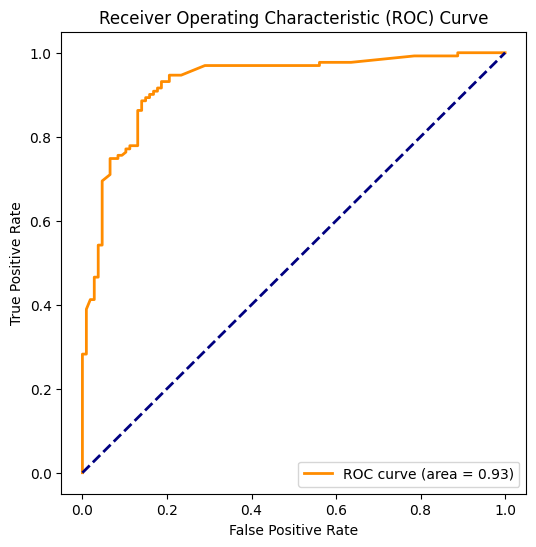

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)
tf.random.set_seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "cholesterol", "resting ecg", "max heart rate", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Reshape the data for CNN input
X_train_cnn = X_train.reshape(-1, X_train.shape[1], 1)
X_test_cnn = X_test.reshape(-1, X_test.shape[1], 1)

# Reshape the data for RNN (SimpleRNN) input
X_train_rnn = X_train.reshape(-1, 1, X_train.shape[1])
X_test_rnn = X_test.reshape(-1, 1, X_test.shape[1])

# Reshape the data for LSTM input
X_train_lstm = X_train.reshape(-1, 1, X_train.shape[1])
X_test_lstm = X_test.reshape(-1, 1, X_test.shape[1])

# Reshape the data for GRU input
X_train_gru = X_train.reshape(-1, 1, X_train.shape[1])
X_test_gru = X_test.reshape(-1, 1, X_test.shape[1])

# Combine all models into a single architecture using the functional API
input_cnn = keras.Input(shape=(X_train_cnn.shape[1], 1))
cnn_layer = layers.Conv1D(filters=64, kernel_size=3, activation='relu')(input_cnn)
cnn_layer = layers.MaxPooling1D(pool_size=2)(cnn_layer)
cnn_layer = layers.Flatten()(cnn_layer)

input_rnn = keras.Input(shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]))
rnn_layer = layers.SimpleRNN(64, return_sequences=True, activation='relu')(input_rnn)
rnn_layer = layers.SimpleRNN(32, return_sequences=True)(rnn_layer)
rnn_layer = layers.SimpleRNN(16)(rnn_layer)

input_lstm = keras.Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))
lstm_layer = layers.LSTM(64, return_sequences=True, activation='relu')(input_lstm)
lstm_layer = layers.LSTM(32, return_sequences=True)(lstm_layer)
lstm_layer = layers.LSTM(16)(lstm_layer)

input_gru = keras.Input(shape=(X_train_gru.shape[1], X_train_gru.shape[2]))
gru_layer = layers.GRU(64, return_sequences=True, activation='relu')(input_gru)
gru_layer = layers.GRU(32, return_sequences=True)(gru_layer)
gru_layer = layers.GRU(16)(gru_layer)

# Bidirectional LSTM
input_bilstm = keras.Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))
bilstm_layer = layers.Bidirectional(layers.LSTM(64, return_sequences=True, activation='relu'))(input_bilstm)
bilstm_layer = layers.Bidirectional(layers.LSTM(32, return_sequences=True))(bilstm_layer)
bilstm_layer = layers.Bidirectional(layers.LSTM(16))(bilstm_layer)

# Bidirectional GRU
input_bigru = keras.Input(shape=(X_train_gru.shape[1], X_train_gru.shape[2]))
bigru_layer = layers.Bidirectional(layers.GRU(64, return_sequences=True, activation='relu'))(input_bigru)
bigru_layer = layers.Bidirectional(layers.GRU(32, return_sequences=True))(bigru_layer)
bigru_layer = layers.Bidirectional(layers.GRU(16))(bigru_layer)

# Concatenate the outputs from all branches
concatenated = layers.Concatenate(axis=-1)([cnn_layer, rnn_layer, lstm_layer, gru_layer, bilstm_layer, bigru_layer])

# Additional dense layers
x = layers.Dense(128, activation='relu')(concatenated)
output = layers.Dense(1, activation='sigmoid')(x)

# Create the model
model = keras.Model(inputs=[input_cnn, input_rnn, input_lstm, input_gru, input_bilstm, input_bigru], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit([X_train_cnn, X_train_rnn, X_train_lstm, X_train_gru, X_train_lstm, X_train_gru],
                    y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=2, callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate([X_test_cnn, X_test_rnn, X_test_lstm, X_test_gru, X_test_lstm, X_test_gru], y_test, verbose=2)
print("Test Accuracy:", test_accuracy)

# Confusion Matrix
y_pred = (model.predict([X_test_cnn, X_test_rnn, X_test_lstm, X_test_gru, X_test_lstm, X_test_gru]) > 0.8).astype("int32")
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Sensitivity (Recall):", recall)
print("Specificity:", confusion_matrix(y_test, y_pred)[0, 0] / (confusion_matrix(y_test, y_pred)[0, 0] + confusion_matrix(y_test, y_pred)[0, 1]))
print("F1 Score:", f1)

# ROC Curve with AUC
y_pred_proba = model.predict([X_test_cnn, X_test_rnn, X_test_lstm, X_test_gru, X_test_lstm, X_test_gru])
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**CatBoost**

0:	learn: 0.5305468	test: 0.5209626	best: 0.5209626 (0)	total: 55.6ms	remaining: 5.5s
10:	learn: 0.3250725	test: 0.3333008	best: 0.3333008 (10)	total: 62.3ms	remaining: 504ms
20:	learn: 0.3032897	test: 0.3206253	best: 0.3206253 (20)	total: 66ms	remaining: 248ms
30:	learn: 0.3005181	test: 0.3188834	best: 0.3188834 (30)	total: 70ms	remaining: 156ms
40:	learn: 0.2825176	test: 0.3185925	best: 0.3167972 (32)	total: 74.4ms	remaining: 107ms
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.3167972253
bestIteration = 32

Shrink model to first 33 iterations.
Test Accuracy: 0.8067226890756303
Precision: 0.956989247311828
Sensitivity (Recall): 0.6793893129770993
Specificity: 0.9626168224299065
F1 Score: 0.7946428571428572
Confusion Matrix:
[[103   4]
 [ 42  89]]


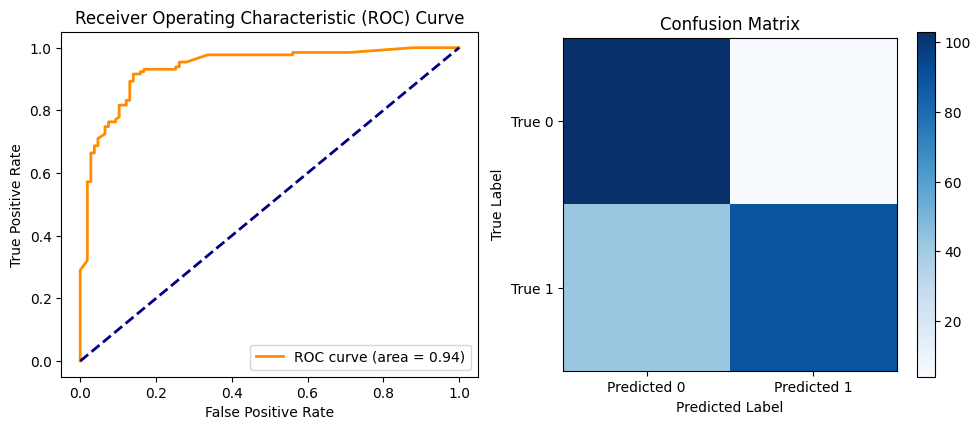

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "cholesterol", "resting ecg", "max heart rate", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Create and train the CatBoost model
cat_features = []  # You can specify categorical features here
model = CatBoostClassifier(iterations=100, depth=7, learning_rate=0.5, loss_function='Logloss', random_seed=0)

model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=10, verbose=10)

# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.8).astype("int32")

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Sensitivity (Recall):", recall)
print("Specificity:", confusion_matrix(y_test, y_pred)[0, 0] / (confusion_matrix(y_test, y_pred)[0, 0] + confusion_matrix(y_test, y_pred)[0, 1]))
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# ROC Curve with AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Display confusion matrix
plt.subplot(2, 2, 2)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['True 0', 'True 1'])

plt.tight_layout()
plt.show()

**LightGBM**

/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	valid_0's binary_logloss: 0.321478
Test Accuracy: 0.8235294117647058
Precision: 0.9238095238095239
Sensitivity (Recall): 0.7404580152671756
Specificity: 0.9252336448598131
F1 Score: 0.8220338983050848
Confusion Matrix:
[[99  8]
 [34 97]]


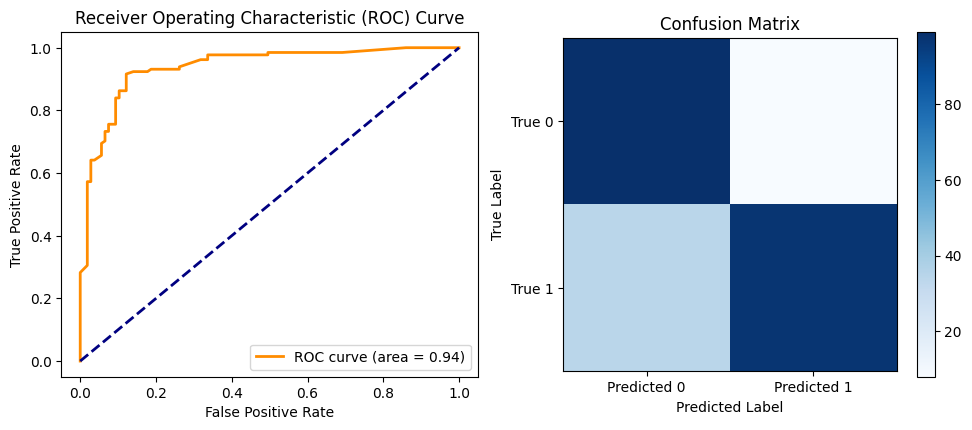

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(0)

# Load the dataset
data = pd.read_csv("/kaggle/input/heart-statlog-cleveland-hungary-dataset/heart_statlog_cleveland_hungary_final.csv")

# Split the data into features (X) and the target (y)
columns_to_drop = ["age", "resting bp s", "cholesterol", "resting ecg", "max heart rate", "target"]
X = data.drop(columns_to_drop, axis=1)
y = data["target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Create and train the LightGBM model
model = LGBMClassifier(n_estimators=100, max_depth=7, learning_rate=0.5, random_state=42, boosting_type='gbdt')

model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=10)

# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.8).astype("int32")

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Sensitivity (Recall):", recall)
print("Specificity:", confusion_matrix(y_test, y_pred)[0, 0] / (confusion_matrix(y_test, y_pred)[0, 0] + confusion_matrix(y_test, y_pred)[0, 1]))
print("F1 Score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# ROC Curve with AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Display confusion matrix
plt.subplot(2, 2, 2)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Predicted 0', 'Predicted 1'])
plt.yticks([0, 1], ['True 0', 'True 1'])

plt.tight_layout()
plt.show()